<a href="https://colab.research.google.com/github/semishen/ML100Days/blob/master/Day_017_HW.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 作業
- 新增一個欄位 `customized_age_grp`，把 `age` 分為 (0, 10], (10, 20], (20, 30], (30, 50], (50, 100] 這五組，
'(' 表示不包含, ']' 表示包含  
- Hints: 執行 ??pd.cut()，了解提供其中 bins 這個參數的使用方式

# [作業目標]
- 請同學試著查詢 pandas.cut 這個函數還有哪些參數, 藉由改動參數以達成目標
- 藉由查詢與改動參數的過程, 熟悉查詢函數的方法與理解參數性質, 並了解數值的離散化的調整工具

# [作業重點]
- 仿照 In[3], In[4] 的語法, 並設定 pd.cut 的參數以指定間距

In [0]:
# 載入套件
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

In [0]:
# 初始設定 Ages 的資料
ages = pd.DataFrame({"age": [18,22,25,27,7,21,23,37,30,61,45,41,9,18,80,100]})

#### 等寬劃分

In [0]:
# 新增欄位 "equal_width_age", 對年齡做等寬劃分
ages["equal_width_age"] = pd.cut(ages["age"], 4)

In [4]:
# 觀察等寬劃分下, 每個種組距各出現幾次
ages["equal_width_age"].value_counts() # 每個 bin 的值的範圍大小都是一樣的

(6.907, 30.25]    10
(30.25, 53.5]      3
(76.75, 100.0]     2
(53.5, 76.75]      1
Name: equal_width_age, dtype: int64

#### 等頻劃分

In [0]:
# 新增欄位 "equal_freq_age", 對年齡做等頻劃分
ages["equal_freq_age"] = pd.qcut(ages["age"], 4)

In [6]:
# 觀察等頻劃分下, 每個種組距各出現幾次
ages["equal_freq_age"].value_counts() # 每個 bin 的資料筆數是一樣的

(42.0, 100.0]     4
(26.0, 42.0]      4
(20.25, 26.0]     4
(6.999, 20.25]    4
Name: equal_freq_age, dtype: int64

In [8]:
ages['age'].value_counts().sort_index()

7      1
9      1
18     2
21     1
22     1
23     1
25     1
27     1
30     1
37     1
41     1
45     1
61     1
80     1
100    1
Name: age, dtype: int64

In [12]:
bins = [0, 10, 20, 30, 50, 100]
ages['customized_age_grp'] = pd.cut(ages["age"], bins=bins)
ages['customized_age_grp'].value_counts().sort_index()

(0, 10]      2
(10, 20]     2
(20, 30]     6
(30, 50]     3
(50, 100]    3
Name: customized_age_grp, dtype: int64

In [18]:
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


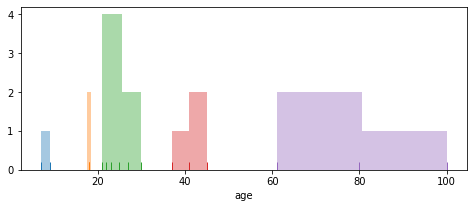

In [32]:
customized_age_grp = ages['customized_age_grp'].value_counts().index.categories
plt.figure(figsize=(8, 3))
for i in range(len(customized_age_grp)):
  tmp_df = ages[ages['customized_age_grp'] == customized_age_grp[i]]
  sns.distplot(tmp_df['age'], kde=False, rug=True)